# Local Search

In this notebook, we will show how to improve the solution at hand using local search and other techniques. Here we solve TSP and use 2-opt to improve the solution. You can check how the improvement works for other problems in each Env's `local_search` method. 

Note that this notebook is based on [`1-quickstart`](../1-quickstart.ipynb) and we use the checkpoint file from it. If you haven't checked it yet, we recommend you to check it first.

<a href="https://colab.research.google.com/github/ai4co/rl4co/blob/main/examples/advanced/3-local-search.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

### Installation

We use LocalSearch operator provided by PyVRP. See https://github.com/PyVRP/PyVRP for more details.

Uncomment the following line to install the package from PyPI. Remember to choose a GPU runtime for faster training!

> Note: You may need to restart the runtime in Colab after this


In [1]:
# !pip install rl4co[routing]  # include pyvrp

### Imports

In [2]:
import torch

from rl4co.envs import TSPEnv
from rl4co.models.zoo import AttentionModel

### Environment, Policy, and Model from saved checkpoint

In [3]:
# RL4CO env based on TorchRL
env = TSPEnv(num_loc=50) 

checkpoint_path = "../tsp-quickstart.ckpt"  # checkpoint from the ../1-quickstart.ipynb

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model: default is AM with REINFORCE and greedy rollout baseline
model = AttentionModel.load_from_checkpoint(checkpoint_path, load_baseline=False)

/home/sanghyeok/NCO/rl4co/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'env' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['env'])`.
/home/sanghyeok/NCO/rl4co/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'policy' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['policy'])`.
/home/sanghyeok/NCO/rl4co/.venv/lib/python3.10/site-packages/lightning/pytorch/core/saving.py:188: Found keys that are not in the model state dict but in the checkpoint: ['baseline.baseline.model.encoder.init_embedding.init_embed.weight', 'baseline.baseline.model.encoder.init_embedding.init_embed.bias', 'baseline.baseline.model.encoder.net.layers.0.0.module.Wqkv.weight', 'baseline.baseline.model.encoder.net.layers.0.0.module.Wqkv.bias

### Testing with Solution Improvement

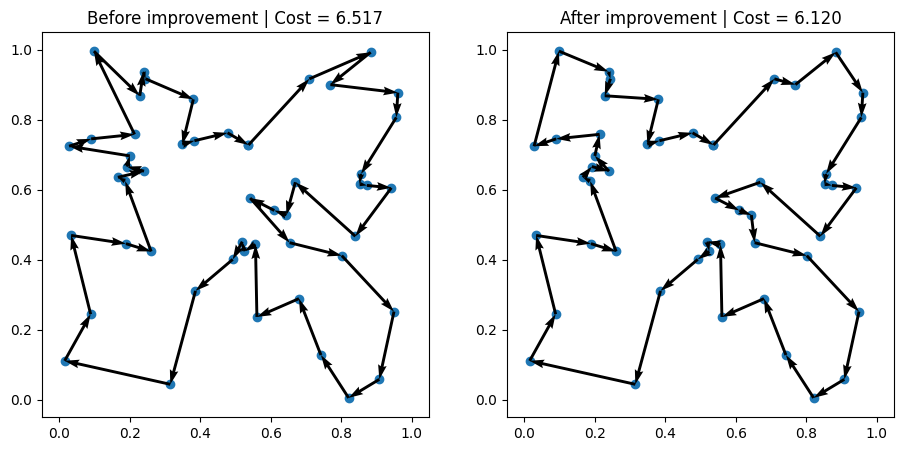

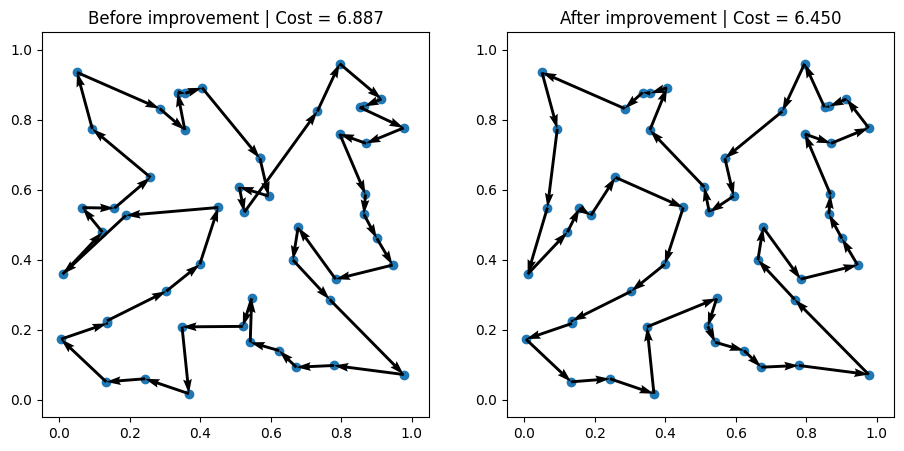

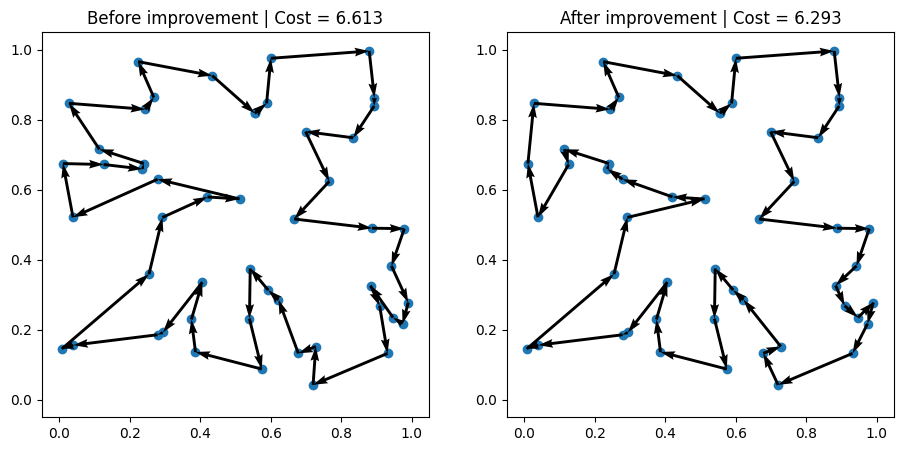

In [4]:
# Greedy rollouts over trained model (same states as previous plot)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
td_init = env.reset(batch_size=[3]).to(device)
model = model.to(device)
out = model(td_init.clone(), phase="test", decode_type="greedy")
actions = out['actions']

# Improve solutions using LocalSearch
improved_actions = env.local_search(td_init, actions, rng=0)
improved_rewards = env.get_reward(td_init, improved_actions)

# Plotting
import matplotlib.pyplot as plt
for i, td in enumerate(td_init):
    fig, axs = plt.subplots(1,2, figsize=(11,5))
    env.render(td, actions[i], ax=axs[0]) 
    env.render(td, improved_actions[i], ax=axs[1])
    axs[0].set_title(f"Before improvement | Cost = {-out['reward'][i].item():.3f}")
    axs[1].set_title(f"After improvement | Cost = {-improved_rewards[i].item():.3f}")

We can see that the solution has improved after using 2-opt.